In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler

In [52]:
# Load dataset
df = pd.read_csv('train_ML_IOT.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [54]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [55]:
df.head()

,DateTime,Junction,Vehicles,ID
0,11/1/2015 0:00,1,15,20151101001
1,11/1/2015 1:00,1,13,20151101011
2,11/1/2015 2:00,1,10,20151101021
3,11/1/2015 3:00,1,7,20151101031
4,11/1/2015 4:00,1,9,20151101041


In [56]:
df.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
for col in df.columns:
    print(f"Unique values in '{col}':\n{df[col].unique()}\n")

Unique values in 'DateTime':
['11/1/2015 0:00' '11/1/2015 1:00' '11/1/2015 2:00' ... '6/30/2017 21:00'
 '6/30/2017 22:00' '6/30/2017 23:00']

Unique values in 'Junction':
[1 2 3 4]

Unique values in 'Vehicles':
[ 15  13  10   7   9   6   8  11  12  17  16  20  19  14  22  32  31  35
  26  34  30  27  24  29  21  18  33  28  25  23  40  38  36  48  43  41
  37  39  42  44  47  50  45  46  70  54  52  55  49  58  64  62  51  53
  61  56  57  63  59  60  67  76  79  66  65  68  69  86  73  77  74  71
  72  78   5  81  75  80  82  89  83  93  91  85  90  84  87  94  92 106
  98  88  96 120  97 104  95 100 112 103 105 143 134 135 141 156 110 102
  99 132 124 113 109 115 101 108 114 107 111 136 129 118 116 123 133 128
 117 121 127 140 126 122 119   2   4   3   1 125 180 173 162]

Unique values in 'ID':
[20151101001 20151101011 20151101021 ... 20170630214 20170630224
 20170630234]



In [59]:
# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [61]:
print("Date range:", df['DateTime'].min(), "to", df['DateTime'].max())

Date range: 2015-11-01 00:00:00 to 2017-06-30 23:00:00


In [62]:
df['Year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['Week'] = df['DateTime'].dt.isocalendar().week  # Week of the year
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

In [63]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,month,Week,Day,Hour,Minute
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,44,1,0,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,44,1,1,0
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,44,1,2,0
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,44,1,3,0
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,44,1,4,0


# **Preprocessing**

# Transformation des Données

In [64]:
# Extract temporal features
df['DayOfWeek'] = df['DateTime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['IsWeekend'] = df['DayOfWeek'] >= 5

In [65]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,month,Week,Day,Hour,Minute,DayOfWeek,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,44,1,0,0,6,True
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,44,1,1,0,6,True
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,44,1,2,0,6,True
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,44,1,3,0,6,True
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,44,1,4,0,6,True


In [66]:
# Function to assign seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'automn'

df['Season'] = df['month'].apply(assign_season)

In [67]:
df = df.drop(columns='ID',axis=True)

In [68]:
df.head()

,DateTime,Junction,Vehicles,Year,month,Week,Day,Hour,Minute,DayOfWeek,IsWeekend,Season
0,2015-11-01 00:00:00,1,15,2015,11,44,1,0,0,6,True,automn
1,2015-11-01 01:00:00,1,13,2015,11,44,1,1,0,6,True,automn
2,2015-11-01 02:00:00,1,10,2015,11,44,1,2,0,6,True,automn
3,2015-11-01 03:00:00,1,7,2015,11,44,1,3,0,6,True,automn
4,2015-11-01 04:00:00,1,9,2015,11,44,1,4,0,6,True,automn


In [69]:
df.tail()

,DateTime,Junction,Vehicles,Year,month,Week,Day,Hour,Minute,DayOfWeek,IsWeekend,Season
48115,2017-06-30 19:00:00,4,11,2017,6,26,30,19,0,4,False,Summer
48116,2017-06-30 20:00:00,4,30,2017,6,26,30,20,0,4,False,Summer
48117,2017-06-30 21:00:00,4,16,2017,6,26,30,21,0,4,False,Summer
48118,2017-06-30 22:00:00,4,22,2017,6,26,30,22,0,4,False,Summer
48119,2017-06-30 23:00:00,4,12,2017,6,26,30,23,0,4,False,Summer


In [70]:
df['IsWeekend'] = df['IsWeekend'].astype(int)


In [71]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Season' column
df['Season'] = label_encoder.fit_transform(df['Season'])

In [72]:
df.head()

,DateTime,Junction,Vehicles,Year,month,Week,Day,Hour,Minute,DayOfWeek,IsWeekend,Season
0,2015-11-01 00:00:00,1,15,2015,11,44,1,0,0,6,1,3
1,2015-11-01 01:00:00,1,13,2015,11,44,1,1,0,6,1,3
2,2015-11-01 02:00:00,1,10,2015,11,44,1,2,0,6,1,3
3,2015-11-01 03:00:00,1,7,2015,11,44,1,3,0,6,1,3
4,2015-11-01 04:00:00,1,9,2015,11,44,1,4,0,6,1,3


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   48120 non-null  datetime64[ns]
 1   Junction   48120 non-null  int64         
 2   Vehicles   48120 non-null  int64         
 3   Year       48120 non-null  int64         
 4   month      48120 non-null  int64         
 5   Week       48120 non-null  UInt32        
 6   Day        48120 non-null  int64         
 7   Hour       48120 non-null  int64         
 8   Minute     48120 non-null  int64         
 9   DayOfWeek  48120 non-null  int64         
 10  IsWeekend  48120 non-null  int32         
 11  Season     48120 non-null  int32         
dtypes: UInt32(1), datetime64[ns](1), int32(2), int64(8)
memory usage: 3.9 MB


# Normalisation et Structuration 

In [74]:
# Normalize 'Vehicles' column if needed (example: Min-Max scaling)
scaler = MinMaxScaler()
df['Vehicles'] = scaler.fit_transform(df[['Vehicles']])

In [75]:
# Save processed data for modeling
df.to_csv('processed_traffic_data.csv', index=False)

# **3. Exploratory Data Analysis (EDA)**

C:\Users\HP\AppData\Local\Temp\ipykernel_20660\3374978267.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


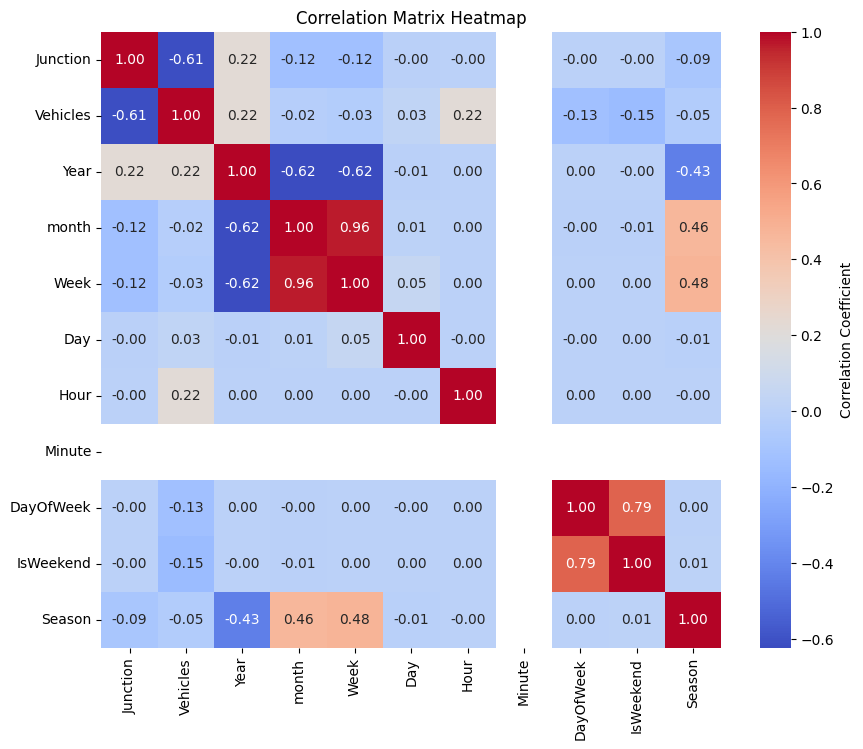

In [76]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()


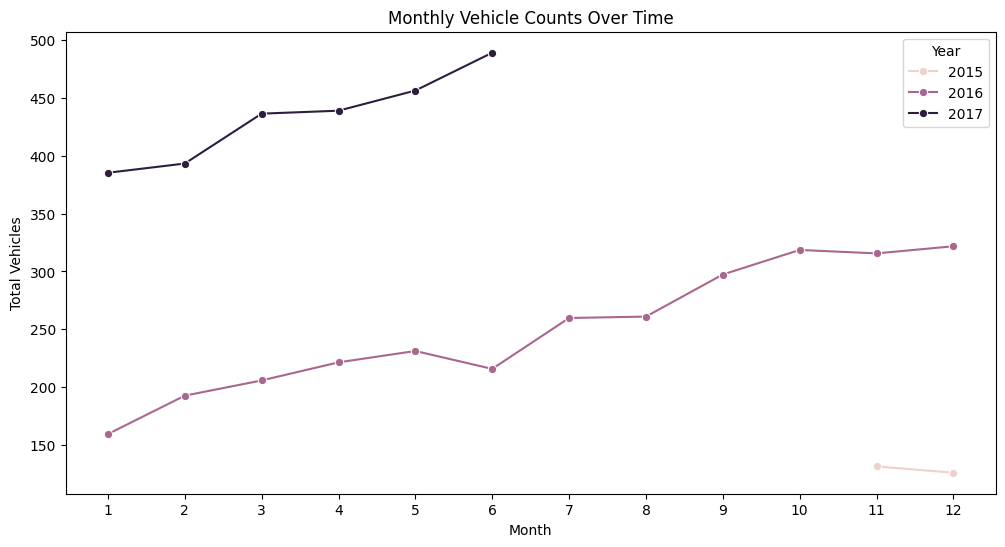

In [77]:
monthly_vehicle_counts = df.groupby(['Year', 'month'])['Vehicles'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_vehicle_counts, x="month", y="Vehicles", hue="Year", marker="o")
plt.title("Monthly Vehicle Counts Over Time")
plt.xlabel("Month")
plt.ylabel("Total Vehicles")
plt.legend(title="Year")
plt.xticks(range(1, 13))
plt.show()

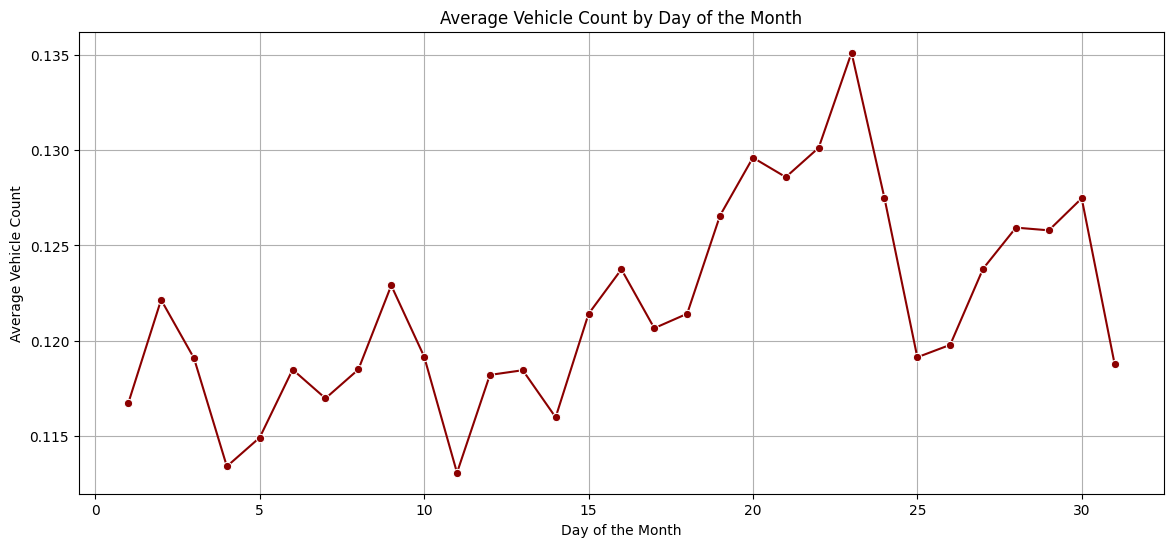

In [78]:
# Group data to get the average vehicle count per day
daily_avg_vehicles = df.groupby('Day')['Vehicles'].mean().reset_index()

# Plot the average vehicle count per day
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg_vehicles, x="Day", y="Vehicles", marker="o", color="darkred")

# Set plot titles and labels
plt.title("Average Vehicle Count by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Average Vehicle Count")
plt.grid(True)
plt.show()


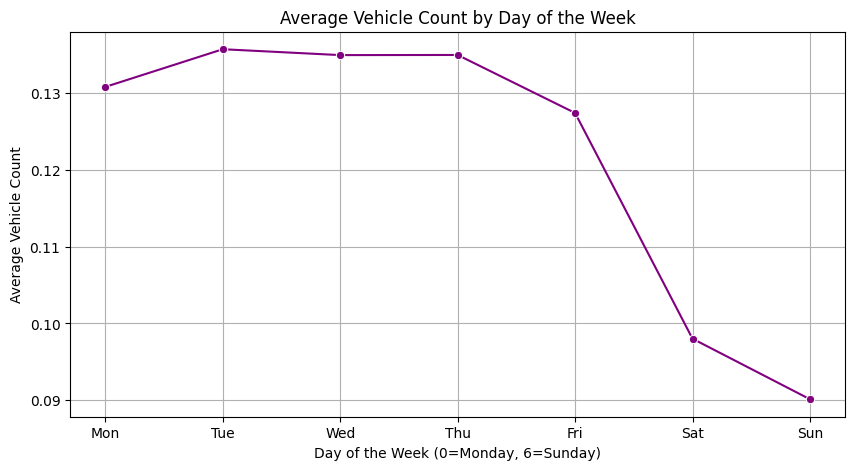

In [79]:
# Plotting the average vehicle count by day of the week using a line plot
plt.figure(figsize=(10, 5))
weekday_vehicle_counts = df.groupby('DayOfWeek')['Vehicles'].mean().reset_index()
sns.lineplot(data=weekday_vehicle_counts, x="DayOfWeek", y="Vehicles", marker="o", color="purple")

# Set plot titles and labels
plt.title("Average Vehicle Count by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Vehicle Count")
plt.grid(True)
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


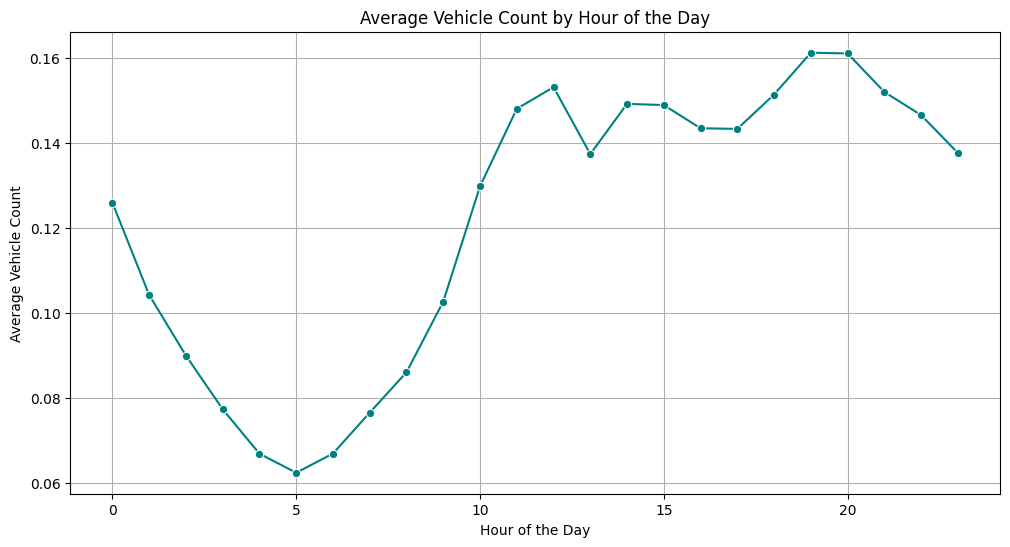

In [80]:
# Group data to get the average vehicle count per hour
hourly_avg_vehicles = df.groupby('Hour')['Vehicles'].mean().reset_index()

# Plot the average vehicle count per hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg_vehicles, x="Hour", y="Vehicles", marker="o", color="teal")

# Set plot titles and labels
plt.title("Average Vehicle Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Vehicle Count")
plt.grid(True)
plt.show()


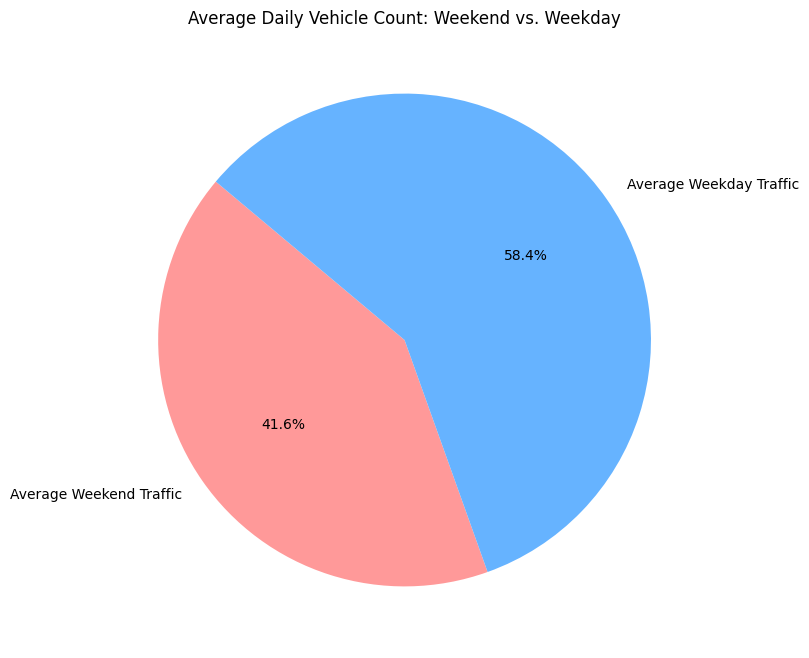

In [81]:
# Identify weekends (Saturday=5, Sunday=6)
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])

# Calculate average daily vehicle count for weekends and weekdays
weekday_avg = df[~df['IsWeekend']].groupby(df['DateTime'].dt.date)['Vehicles'].mean().mean()
weekend_avg = df[df['IsWeekend']].groupby(df['DateTime'].dt.date)['Vehicles'].mean().mean()

# Prepare data for pie chart
labels = ['Average Weekend Traffic', 'Average Weekday Traffic']
sizes = [weekend_avg, weekday_avg]
colors = ['#ff9999', '#66b3ff']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Average Daily Vehicle Count: Weekend vs. Weekday")
plt.show()

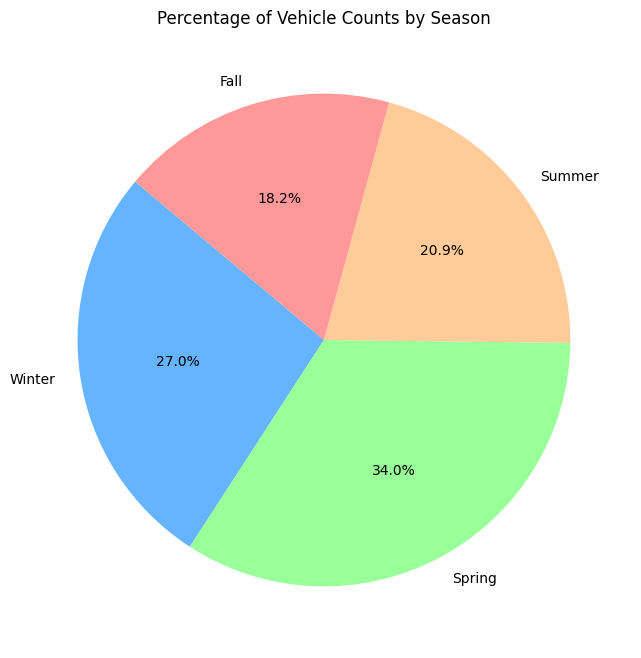

In [82]:


# Define a function to map each month to a season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Create a 'Season' column
df['Season'] = df['DateTime'].dt.month.apply(get_season)

# Aggregate the total number of vehicles by season
seasonal_totals = df.groupby('Season')['Vehicles'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(seasonal_totals, labels=seasonal_totals.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title("Percentage of Vehicle Counts by Season")
plt.show()


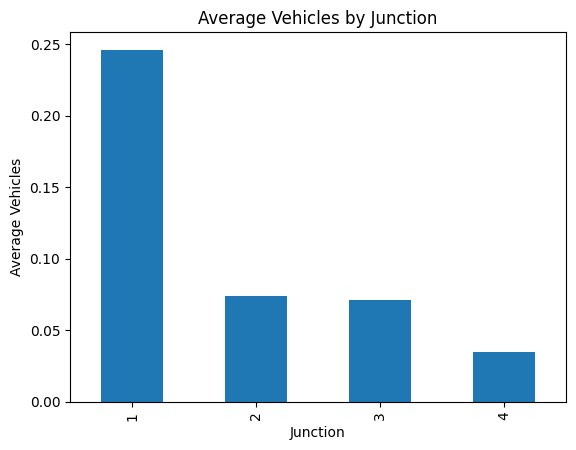

In [83]:
import matplotlib.pyplot as plt
df.groupby('Junction')['Vehicles'].mean().plot(kind='bar')
plt.xlabel('Junction')
plt.ylabel('Average Vehicles')
plt.title('Average Vehicles by Junction')
plt.show()


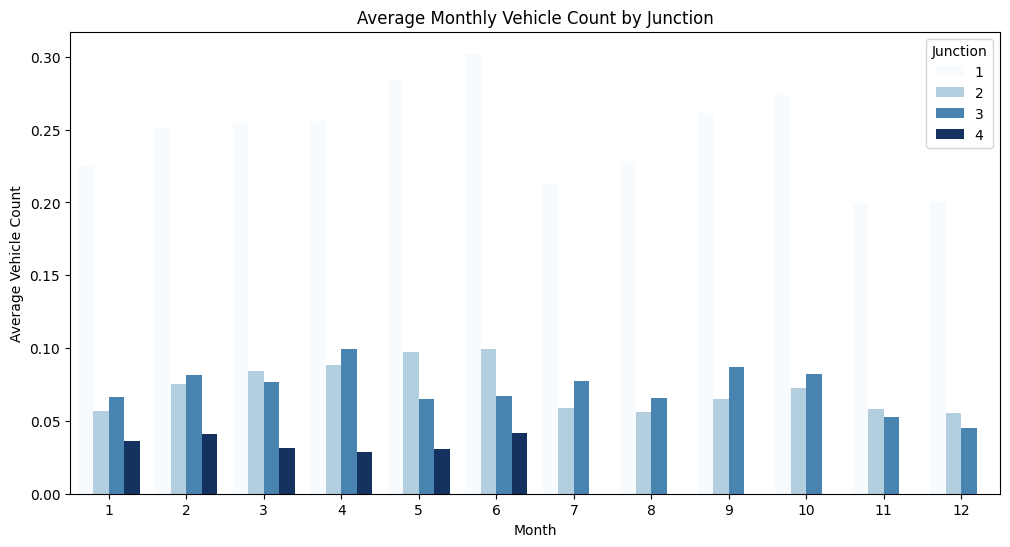

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data to get the average vehicle count by Month and Junction
monthly_avg_vehicles = df.groupby(['month', 'Junction'])['Vehicles'].mean().reset_index()

# Plotting the average vehicle count
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg_vehicles, x="month", y="Vehicles", hue="Junction", palette="Blues")

# Setting plot titles and labels
plt.title("Average Monthly Vehicle Count by Junction")
plt.xlabel("Month")
plt.ylabel("Average Vehicle Count")
plt.legend(title="Junction", loc="upper right")
plt.show()


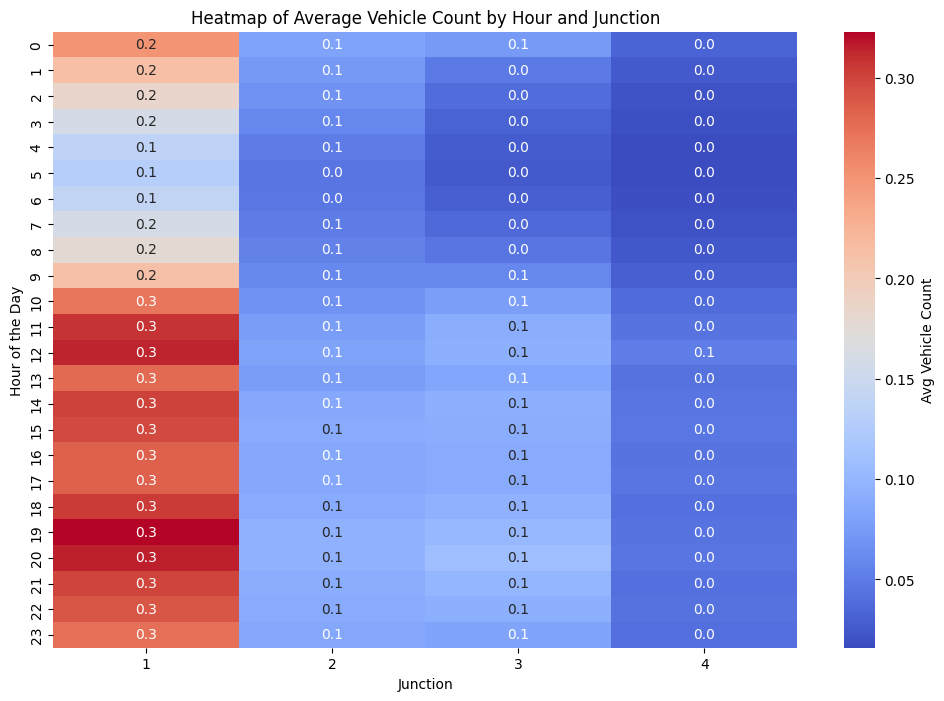

In [85]:
# Pivot table for heatmap: average vehicle count by hour and junction
hour_junction_pivot = df.pivot_table(values='Vehicles', index='Hour', columns='Junction', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hour_junction_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Avg Vehicle Count'})
plt.title('Heatmap of Average Vehicle Count by Hour and Junction')
plt.xlabel('Junction')
plt.ylabel('Hour of the Day')
plt.show()


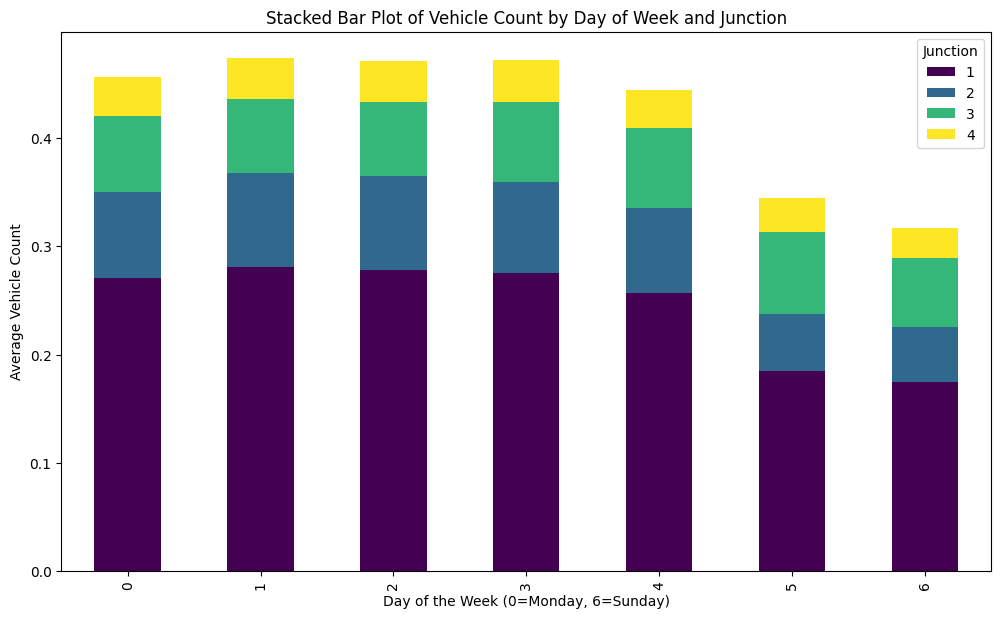

In [86]:
# Grouping data by junction and day of the week
junction_day_pivot = df.groupby(['DayOfWeek', 'Junction'])['Vehicles'].mean().unstack()

# Plotting the stacked bar plot
junction_day_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# Setting plot labels and title
plt.title('Stacked Bar Plot of Vehicle Count by Day of Week and Junction')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Vehicle Count')
plt.legend(title='Junction')
plt.show()


# **Modeling and Prediction**

# **LTSM**

In [98]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [99]:
def prepare_data_with_features(df, junction=1, sequence_length=30):
    """
    Prépare les données avec des variables exogènes (jours de la semaine, heures).
    """
    df = df[df['Junction'] == junction].copy()
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df = df.set_index('DateTime')
    
    # Ajouter des variables temporelles exogènes
    df['Hour'] = df.index.hour
    df['DayOfWeek'] = df.index.dayofweek
    df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)  # 1 si week-end, sinon 0
    
    scaler = MinMaxScaler()
    features = ['Vehicles', 'Hour', 'DayOfWeek', 'IsWeekend']
    data_scaled = scaler.fit_transform(df[features])
    
    X, y = [], []
    for i in range(len(data_scaled) - sequence_length):
        X.append(data_scaled[i:i + sequence_length])
        y.append(data_scaled[i + sequence_length, 0])  # Cible: "Vehicles"
    
    return np.array(X), np.array(y), scaler, df.index[sequence_length:]

In [100]:
# Préparer les données
sequence_length = 30
X, y, scaler, dates = prepare_data_with_features(df)

# Diviser en ensembles d'entraînement et de test
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [101]:
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Regularisation
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Sortie pour prédiction
])

# Compilation du modèle avec un taux d'apprentissage ajusté
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
model.summary()

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,305 (540.25 KB)

 Trainable params: 138,305 (540.25 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    epochs=20,  # Augmentation du nombre d'époques
    batch_size=64,  # Ajustement de la taille des batchs
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - loss: 0.0151 - val_loss: 0.0041
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 9.8138e-04 - val_loss: 0.0018
Epoch 10/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 9.6178e-04 - val_loss: 0.0028
Epoch 11/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 9.2905e-04 - val_loss: 0.0018
Epoch 12/20
183/183 ━━

In [103]:
# Prédictions sur les données de test
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(
    np.hstack((predictions, np.zeros((predictions.shape[0], X_test.shape[2] - 1))))
)[:, 0]  # Inverser uniquement la colonne des prédictions "Vehicles"


92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


In [104]:
# Évaluation du modèle
y_test_rescaled = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))))
)[:, 0]

In [105]:
# Métriques d'évaluation
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R²: {r2:.5f}")

MSE: 0.00096
RMSE: 0.03097
MAE: 0.02378
R²: 0.94498


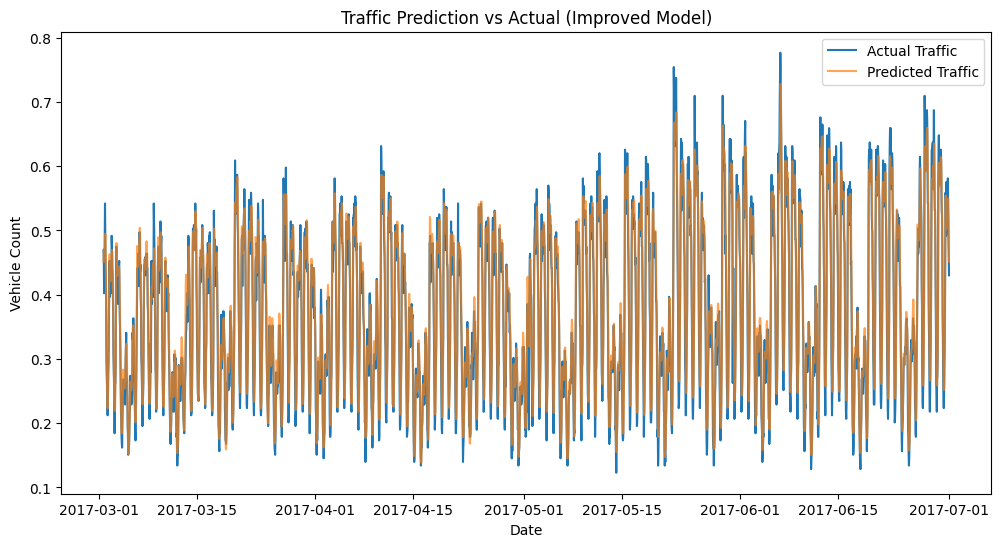

In [106]:
# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.plot(dates[-len(y_test):], y_test_rescaled, label='Actual Traffic')
plt.plot(dates[-len(y_test):], predictions_rescaled, label='Predicted Traffic', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.title('Traffic Prediction vs Actual (Improved Model)')
plt.legend()
plt.show()

# **ARIMA**

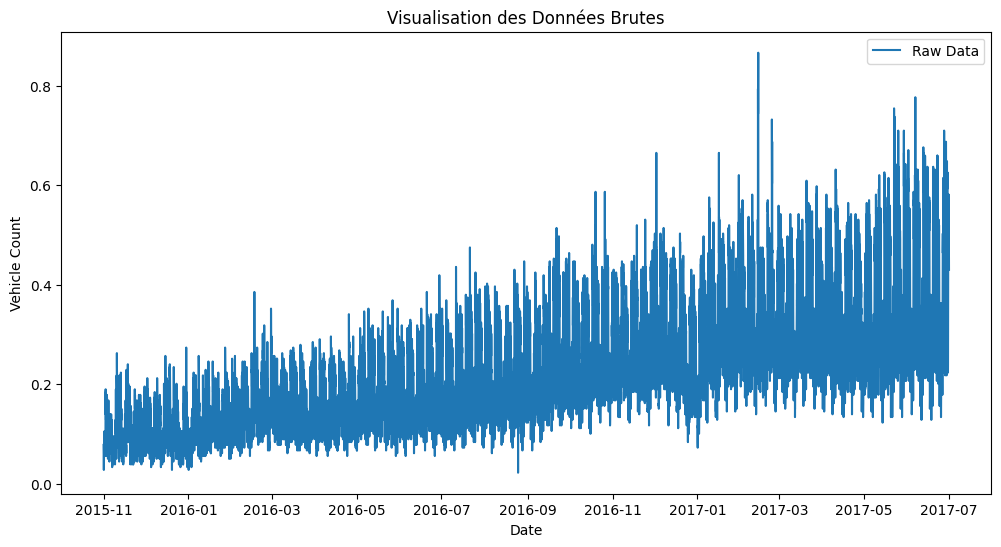

Résultats du Test ADF :
Statistique ADF : -7.148
P-value : 0.000
Nombre de décalages utilisés : 42
Valeurs critiques :
   1%: -3.431
   5%: -2.862
   10%: -2.567
Conclusion : Les données sont stationnaires (p-value < 0.05).


In [108]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Charger les données pour une seule jonction
df_junction1 = df[df['Junction'] == 1].set_index('DateTime')['Vehicles']

# Visualiser la série temporelle brute
plt.figure(figsize=(12, 6))
plt.plot(df_junction1, label="Raw Data")
plt.title("Visualisation des Données Brutes")
plt.xlabel("Date")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()

# Test ADF pour vérifier la stationnarité
result = adfuller(df_junction1)
print("Résultats du Test ADF :")
print(f"Statistique ADF : {result[0]:.3f}")
print(f"P-value : {result[1]:.3f}")
print(f"Nombre de décalages utilisés : {result[2]}")
print("Valeurs critiques :")
for key, value in result[4].items():
    print(f"   {key}: {value:.3f}")

# Interprétation du résultat
if result[1] < 0.05:
    print("Conclusion : Les données sont stationnaires (p-value < 0.05).")
else:
    print("Conclusion : Les données ne sont PAS stationnaires (p-value >= 0.05).")


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


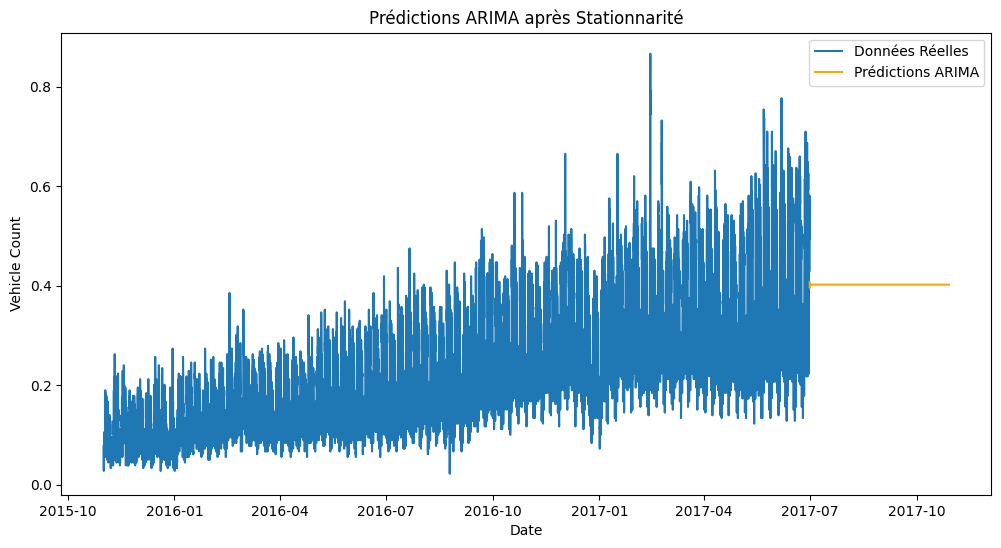

In [109]:
from statsmodels.tsa.arima.model import ARIMA

# Ajuster le modèle ARIMA après stationnarité
model = ARIMA(df_junction1, order=(5, 1, 0))  # Ici, 'd=1' indique 1 différenciation
model_fit = model.fit()

# Prédiction sur les prochaines étapes
forecast = model_fit.forecast(steps=4 * 30 * 24)  # Exemple pour prédire 4 mois
plt.figure(figsize=(12, 6))
plt.plot(df_junction1, label="Données Réelles")
plt.plot(forecast.index, forecast, label="Prédictions ARIMA", color='orange')
plt.title("Prédictions ARIMA après Stationnarité")
plt.xlabel("Date")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


MSE: 0.02282
RMSE: 0.15105
MAE: 0.11948
R²: -0.31090


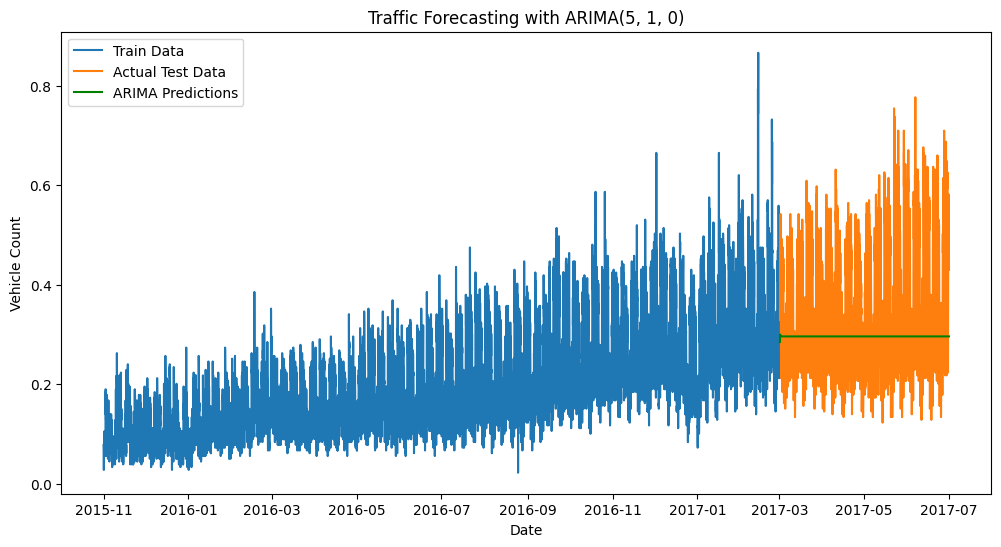

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Filtrer les données pour une seule jonction
df_junction1 = df[df['Junction'] == 1].set_index('DateTime')['Vehicles']

# Diviser en train et test (80% train, 20% test)
train_size = int(len(df_junction1) * 0.8)
train, test = df_junction1[:train_size], df_junction1[train_size:]

# Ajuster le modèle ARIMA
order = (5, 1, 0)  # Paramètres à ajuster
model = ARIMA(train, order=order)
model_fit = model.fit()

# Prédire les données de test
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Évaluation des performances
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R²: {r2:.5f}")

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(forecast_index, forecast, color='green', label='ARIMA Predictions')
plt.title(f'Traffic Forecasting with ARIMA({order[0]}, {order[1]}, {order[2]})')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()


P-value ADF : 6.836129925490124e-10
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-47835.966, Time=16.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-47301.492, Time=3.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-47696.472, Time=0.93 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-47625.783, Time=3.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-47303.489, Time=0.87 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-47856.140, Time=12.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-47748.519, Time=6.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-47828.925, Time=7.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-47890.926, Time=22.26 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-47832.882, Time=9.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-48213.497, Time=25.76 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-48208.990, Time=30.55 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-48246.059, Time=32.47 sec
 ARIMA(1,1,4)(0,0,0)[0] interce

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 0.13447


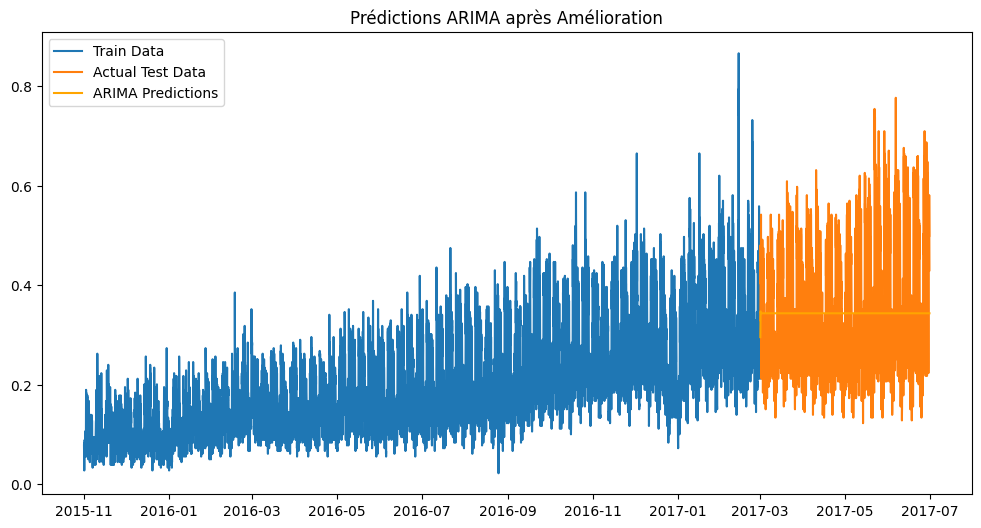

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Préparation des données
df_junction1 = df[df['Junction'] == 1].set_index('DateTime')['Vehicles']
train_size = int(len(df_junction1) * 0.8)
train, test = df_junction1[:train_size], df_junction1[train_size:]

# Test ADF pour la stationnarité
result = adfuller(train)
print(f"P-value ADF : {result[1]}")
if result[1] > 0.05:
    print("Données non stationnaires, appliquer une différenciation.")
    train = train.diff().dropna()

# Optimisation des paramètres ARIMA
auto_model = auto_arima(train, seasonal=False, stepwise=True, trace=True)
print("Paramètres optimaux ARIMA :", auto_model.order)

# Ajustement du modèle ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=auto_model.order)
model_fit = model.fit()

# Prédiction
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Évaluation des performances
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.5f}")

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(forecast_index, forecast, color='orange', label='ARIMA Predictions')
plt.title('Prédictions ARIMA après Amélioration')
plt.legend()
plt.show()
